# Gregory plot

This notebook shows how to use the Gregory diagnostic. Here we focus on the `Gregory` for the single model evaluation and the `PlotGregory` for the multi model plots.

In [10]:
%reload_ext autoreload
%autoreload 2

In [1]:
from aqua.diagnostics.timeseries import Gregory

/LUMI_TYKKY_L60Yfbf/miniconda/envs/env1/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [2]:
dataset_dict = {'catalog': 'climatedt-phase1',
                'model': 'ICON',
                'exp': 'historical-1990',
                'source': 'lra-r100-monthly',
                'startdate': '1990-01-01',
                'enddate': '1999-12-31'}
toa_dict = {'catalog': 'obs',
            'model': 'CERES',
            'exp': 'ebaf-toa42',
            'source': 'monthly',
            'startdate': '1990-01-01',
            'enddate': '2020-12-31'}
t2m_dict = {'catalog': 'obs',
            'model': 'ERA5',
            'exp': 'era5',
            'source': 'monthly',
            'startdate': '1990-01-01',
            'enddate': '2020-12-31'}
common_dict = {'loglevel': 'info'}

In [3]:
greg_dataset = Gregory(**dataset_dict,
                       **common_dict)

In [4]:
greg_dataset.run()

2025-04-01 14:48:50 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-04-01 14:48:50 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-04-01 14:48:50 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-04-01 14:49:54 :: Diagnostic :: INFO     -> Computing the Gregory Plot for the ['monthly', 'annual'] frequency.
2025-04-01 14:49:55 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-04-01 14:49:56 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-04-01 14:49:56 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-04-01 14:49:56 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-04-01 14:49:56 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-04-01 14:49:58 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-04-01 14:49:58 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-04-01 14:4

In [5]:
greg_t2m = Gregory(**t2m_dict,
                   **common_dict)
greg_t2m.run(t2m=True, net_toa=False, std=True)
greg_toa = Gregory(**toa_dict,
                   **common_dict)
greg_toa.run(t2m=False, net_toa=True, std=True)

2025-04-01 14:50:03 :: Diagnostic :: INFO     -> Computing the Gregory Plot for the ['monthly', 'annual'] frequency.
2025-04-01 14:50:05 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-04-01 14:50:20 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-04-01 14:50:20 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-04-01 14:50:33 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-04-01 14:50:33 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-04-01 14:50:43 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-04-01 14:50:43 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-04-01 14:50:43 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2025-04-01 14:50:44 :: Diagnostic :: INFO     -> Computing the Gregory Plot for the ['monthly', 'annual'] frequency.
2025-04-01 14:50:46 :: timmean_chunk_completeness :: WARNING  -> Chunk 2000

In [6]:
from aqua.diagnostics.timeseries import PlotGregory

In [7]:
plot_dict = {'t2m_monthly_data': greg_dataset.t2m_monthly,
             'net_toa_monthly_data': greg_dataset.net_toa_monthly,
             't2m_annual_data': greg_dataset.t2m_annual,
             'net_toa_annual_data': greg_dataset.net_toa_annual,
             't2m_monthly_ref': greg_t2m.t2m_monthly,
             'net_toa_monthly_ref': greg_toa.net_toa_monthly,
             't2m_annual_ref': greg_t2m.t2m_annual,
             'net_toa_annual_ref': greg_toa.net_toa_annual,
             't2m_annual_std': greg_t2m.t2m_std,
             'net_toa_annual_std': greg_toa.net_toa_std,
             'loglevel': 'debug'}

In [8]:
plot = PlotGregory(**plot_dict)

2025-04-01 14:50:50 :: PlotGregory :: DEBUG    -> Number of dataset: 1


2025-04-01 14:55:22 :: PlotGregory :: DEBUG    -> Data labels: ['ICON historical-1990']


2025-04-01 14:55:22 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-04-01 14:55:22 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/nurissom/.aqua
2025-04-01 14:55:22 :: ConfigPath :: DEBUG    -> Configuration file found in /users/nurissom/.aqua/config-aqua.yaml
2025-04-01 14:55:22 :: ConfigPath :: DEBUG    -> Catalog found in /users/nurissom/.aqua/config-aqua.yaml file are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs']
2025-04-01 14:55:22 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs']
2025-04-01 14:55:22 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-e25.1
2025-04-01 14:55:22 :: ConfigPath :: DEBUG    -> Catalog file is /users/nurissom/.aqua/catalogs/climatedt-e25.1/catalog.yaml
2025-04-01 14:55:22 :: ConfigPath :: DEBUG    -> Machine file is /users/nurissom/.aqua/catalogs/c

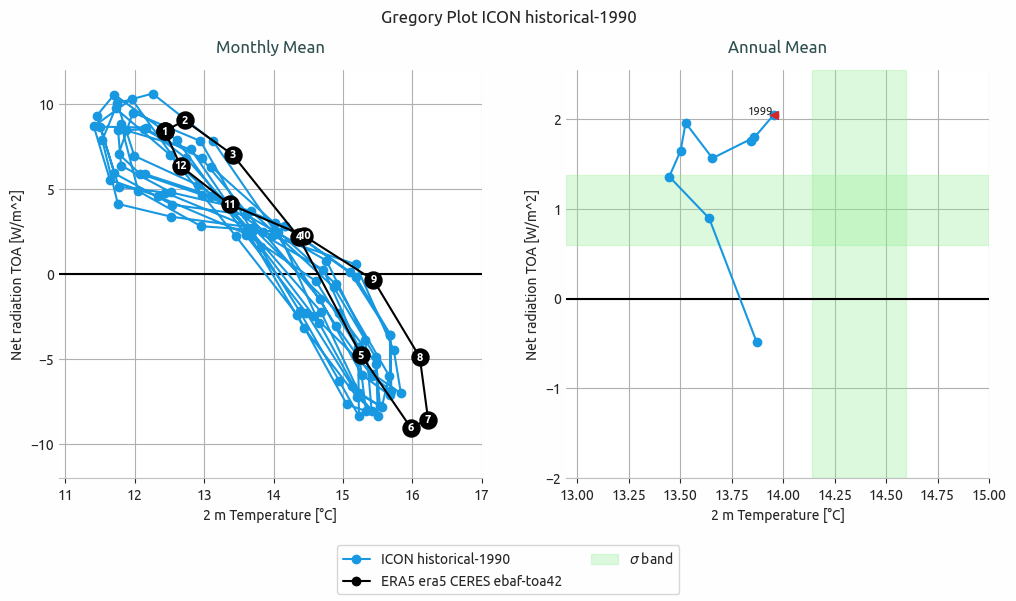

In [11]:
title = plot.set_title()
data_labels = plot.set_data_labels()
ref_label = plot.set_ref_label()
fig = plot.plot(title=title, data_labels=data_labels, ref_label=ref_label)
description = plot.set_description()
plot.save_plot(fig, diagnostic='gregory', description=description)

In [12]:
description

'Gregory Plot ICON historical-1990 using as a reference ERA5 era5 CERES ebaf-toa42.'